# **MDI230 - PROJET TROTTINETTES** 
GUEZ ELIOT, SEMPERE LUCAS

----------------

### **Question 1:**  
Proposez un processus de Markov permettant de modéliser ce système à partir d'un modèle de Markov vu en cours. Vous préciserez l'espace d'état et les différentes paramètres du systèmes, vous pouvez vous aider d'un diagramme de transition.

### **Réponse:**
On propose le processus de Markov, qui suit un modèle de colonies pour modéliser le système de trottinettes.
Il y a 4 états possibles, qui sont les suivants:
- C1: trottinettes libre
- C2: trottinettes utilisées
- C3: trottinettes en recharge
- C4: trottinettes en réparation

Il y a donc N trottinettes dans le système, et on a l'espace d'état $ E=  \{ n= (n_1, n_2, n_3, n_4) | \sum_{i=1}^4 n_i =N \} $.

On a les probabilités de transitions suivantes :

- $ q_{12} = \lambda  1_{n_1 > 0} $
- $ q_{21} = \frac {1- p_{panne}- p_{vide}} {t_{trajet}} n_2  $
- $ q_{23} = \frac {p_{vide}} {t_{trajet}} n_2  $
- $ q_{24} = \frac {p_{panne}} {t_{trajet}} n_2  $
- $ q_{31} = \frac  {1}{t_{intervention} + t_{recharge}} n_3  $
- $ q_{41} = \frac  {1}{t_{intervention} + t_{réparation}} n_4  $

<img src="diagramme_transition.jpeg" alt="Diagramme de transition" width="30%" />




-------------

### **Question 2:**  
Calibrez votre modèle en explicitant vos paramètres en fonction des données de l'énoncé. 

Données : 
- $N = 100$
- $\lambda = 0.1 min^{-1}$
- $t_{trajet} = 5 min$
- $p_{panne} = 0.01$
- $p_{vide} = 0.1$
- $t_{intervention} = 30 min$
- $t_{recharge} = 240 min$
- $t_{réparation} = 720 min$

### **Réponse:**

In [60]:
# on code le modèle précédent 

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# on charge les données
N = 100
lamb = 0.1
t_trajet = 5
p_panne = 0.01
p_vide = 0.1
t_intervention = 30
t_recharge = 240
t_réparation = 720 

# on crée les matrices de transition
lamb_12 = lamb
lamb_21 = 1/ t_trajet * ( 1- p_panne - p_vide)
lamb_31 = 1/ (t_intervention + t_recharge) 
lamb_41 = 1/ (t_intervention + t_réparation)
lamb_23 = 1/ t_trajet * p_vide
lamb_24 = 1/ t_trajet * p_panne

---------------------------------

### **Question 3:**  
Donnez l’expression de la probabilité stationnaire théorique de votre modèle

### **Réponse:**
La probabilié stationnaire est donnée par l'équation suivante:
$$
\pi(n_1, n_2, n_3, n_4) = \frac 1 K \prod_{j=1}^4 \frac {\alpha_j^{n_j}} {\prod_{m=1}^{n_j} \phi_j(m)}
$$
où K est une constante de normalisation, et les $\alpha_j$ sont les solutions des équations de traffics suivantes :
$$
\alpha_j >0 \\
1\leq j \leq 4 \\
\sum_{j=1}^4 \alpha_j = 1
$$
$$
\alpha_j \sum_{i=1}^4 \lambda_{ji} = \sum_{k=1, k \ne j}^4 \lambda_{kj} \alpha_k
$$
$$
\pi(n) = \frac 1 K \alpha_1^{n_1} \frac {\alpha_2^{n_2}} {n_2!} \frac {\alpha_3^{n_3}} {n_3!} \frac {\alpha_4^{n_4}} {n_4!}
$$

Les 4 équations de traffic sont donc :

\begin{cases}
\alpha_1 \lambda = \frac {1- p_{panne}- p_{vide}} {t_{trajet}} \alpha_2 +\alpha_3 \frac 1 {t_{intervention} + t_{rechange}} + \alpha_4 \frac 1 {t_{intervention} + t_{réparation}} \\
\frac {\alpha_2} {t_{trajet}} = \alpha_1 \lambda \\
\alpha_3 \frac 1 {t_{intervention} + t_{recharge}} = \alpha_2 \frac {p_{vide}} {t_{trajet}} \\
\alpha_4 \frac 1 {t_{intervention} + t_{réparation}} = \alpha_2 \frac {p_{panne}} {t_{trajet}} \\
\end{cases}

Ou encore :
\begin{cases}
\alpha_1 \lambda = \frac {1- p_{panne}- p_{vide}} {t_{trajet}} \alpha_2 +\alpha_3 \frac 1 {t_{intervention} + t_{rechange}} + \alpha_4 \frac 1 {t_{intervention} + t_{réparation}} \\
\alpha_2 = \alpha_1 \lambda t_{trajet} \\
\alpha_3  = \alpha_2 \frac {t_{intervention} + t_{recharge}} {t_{trajet}} p_{vide} \\
\alpha_4  = \alpha_2 \frac {t_{intervention} + t_{réparation}} {t_{trajet}} p_{panne}\\
\end{cases}
On a ainsi :
\begin{cases}
\alpha_1 \lambda = \frac {1- p_{panne}- p_{vide}} {t_{trajet}} \alpha_2 +\alpha_3 \frac 1 {t_{intervention} + t_{rechange}} + \alpha_4 \frac 1 {t_{intervention} + t_{réparation}} \\
\alpha_2 = \alpha_1 \lambda t_{trajet} \\
\alpha_3  = \alpha_1 \lambda (t_{intervention} + t_{recharge}) p_{vide} \\
\alpha_4  = \alpha_1 \lambda (t_{intervention} + t_{réparation}) p_{panne} \\
\end{cases}

Puis :
\begin{cases}
\alpha_1 \lambda = \frac {1- p_{panne}- p_{vide}} {t_{trajet}} \alpha_1 \lambda t_{trajet} + \alpha_1 \lambda p_{vide} + \alpha_1 \lambda p_{panne}  \\
\alpha_2 = \alpha_1 \lambda t_{trajet} \\
\alpha_3  = \alpha_1 \lambda (t_{intervention} + t_{recharge}) p_{vide}\\
\alpha_4  = \alpha_1 \lambda (t_{intervention} + t_{réparation}) p_{panne} \\
\end{cases}

Enfin : 
\begin{cases}
\alpha_1 \lambda = \alpha_1 \lambda \\
\alpha_2 = \alpha_1 \lambda t_{trajet} \\
\alpha_3  = \alpha_1 \lambda (t_{intervention} + t_{recharge}) p_{vide}\\
\alpha_4  = \alpha_1 \lambda (t_{intervention} + t_{réparation}) p_{panne} \\
\end{cases}

La première équation ne donne aucune information on utilise le fait que la somme des $\alpha_j$ est égale à 1 pour trouver les valeurs des $\alpha_j$.

On trouve alors :
$$
\alpha_1 (1 + \lambda t_{trajet} + \lambda (t_{intervention} + t_{recharge}) p_{vide} + \lambda (t_{intervention} + t_{réparation}) p_{panne}) = 1 \\
$$

$$
\alpha_1 = \frac 1 {1 + \lambda t_{trajet} + \lambda (t_{intervention} + t_{recharge}) p_{vide} + \lambda (t_{intervention} + t_{réparation}) p_{panne}} \\
$$

\begin{cases}
\alpha_1 = \frac 1 {1 + \lambda t_{trajet} + \lambda (t_{intervention} + t_{recharge}) p_{vide} + \lambda (t_{intervention} + t_{réparation}) p_{panne}} \\
\\
\alpha_2 = \frac {\lambda t_{trajet}} {1 + \lambda t_{trajet} + \lambda (t_{intervention} + t_{recharge}) p_{vide} + \lambda (t_{intervention} + t_{réparation}) p_{panne}} \\
\\
\alpha_3 = \frac {\lambda (t_{intervention} + t_{recharge}) p_{vide}} {1 + \lambda t_{trajet} + \lambda (t_{intervention} + t_{recharge}) p_{vide} + \lambda (t_{intervention} + t_{réparation}) p_{panne}} \\
\\
\alpha_4 = \frac {\lambda (t_{intervention} + t_{réparation}) p_{panne}} {1 + \lambda t_{trajet} + \lambda (t_{intervention} + t_{recharge}) p_{vide} + \lambda (t_{intervention} + t_{réparation}) p_{panne}} \\
\end{cases}

Ainsi avec les calculs numériques on trouve les valeurs théoriques des $\alpha_j$:
\begin{cases}
\alpha_1 = \frac 1 {4.95} \approx 0.2 \\
\alpha_2 = \frac {0.5} {4.95} \approx 0.1 \\
\alpha_3 = \frac {2.7} {4.95} \approx 0.55 \\
\alpha_4 = \frac {0.75} {4.95} \approx 0.15 \\
\end{cases}
Dans la cellule ci-dessous on va calculer les valeurs numériques pour vérifier via numpy

---------------------------------


In [61]:
A = np.array([[-lamb_12,lamb_21 + lamb_23 + lamb_24, 0 ,0],
              [0,-lamb_23,lamb_31,0],
              [0,-lamb_24, 0, lamb_41],
              [1,1,1,1]] )

alphas = np.linalg.solve(A, np.array([0,0,0,1]))

print("Alphas: ", alphas)
print(np.sum(alphas))


Alphas:  [0.2020202  0.1010101  0.54545455 0.15151515]
1.0


Les résultats sont les mêmes ce qui est très rassurant.

----------------

### **Question 4:**  
Simulate the trajectories of your model over at least 100 hours. 

### **Réponse:** 


In [62]:
def new_state(state, lambda_tot, transition_matrix):
    # Choose the next state
    next = np.random.choice(np.arange(16), p=transition_matrix.flatten()/lambda_tot)
    # Update the state
    nstate = state.copy()
    i = (next // 4)  #Line index
    j = (next % 4)  #Column index

    nstate[i] -= 1
    nstate[j] += 1
    return nstate


def simulate(time):
    state = np.array([N,0,0,0])
    states = [state]
    t = 0
    T = [t] 
    while t < time:
        # Create the transition matrix
        transition_matrix = np.array([[0,lamb_12*(state[0]>0),0,0],
                                  [lamb_21*state[1],0,lamb_23*state[1],lamb_24*state[1]],
                                  [lamb_31*state[2],0,0,0],
                                  [lamb_41*state[3],0,0,0]])
        lambda_tot = np.sum(transition_matrix)
        t_next = np.random.exponential(1/lambda_tot)
        
        if t + t_next > time:
            break
        t += t_next
        T.append(t)
        state = new_state(state, lambda_tot, transition_matrix)
        states.append(state)
    return states, T

def plot_states(states, T):
    plt.figure(figsize=(10,5))
    T = np.array(T)
    states = np.array(states)
    plt.plot(T, states[:,0], label="Libre")
    plt.plot(T, states[:,1], label="En cours d'utilisation")
    plt.plot(T, states[:,2], label="En charge")
    plt.plot(T, states[:,3], label="En réparation")
    plt.legend()
    plt.show()


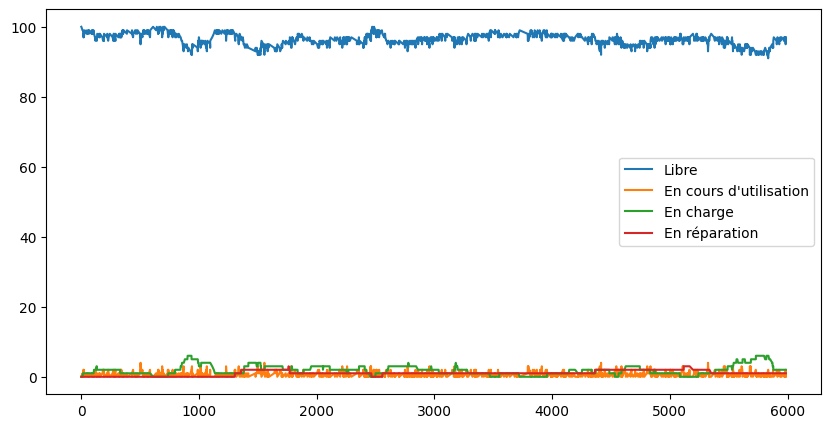

In [63]:
time = 100 * 60 
states, T = simulate(time)
plot_states(states, T)

-------------------

### **Question 5:**  
Validez votre simulation grâce aux résultats théoriques. Pour cela, on limitera le nombre de trottinettes à N = 2. Vous devrez proposer deux manières d’approcher la probabilité stationnaire par vos simulations. On rappelle qu’une simulation est valide si les résultats théoriques sont dans l’intervalle de confiance des résultats simulés.

### **Réponse:** 

On va appliquer les deux méthodes suivantes pour valider les résultats théoriques :
- Méthode 1 : On va simuler le modèle sur une longue durée et on va comptabiliser les différents états à partir d'un certain moment pour calculer la probabilité stationnaire empirique.
- Méthode 2 : On va simuler le modèle sur une longue durée plusieurs fois et récupérer le dernier état de chaque simulation pour calculer la probabilité stationnaire empirique.

Théoriquement pour calculer les probabilités stationnaires on a :

$$
\pi(n) = \frac 1 K \alpha_1^{n_1} \frac {\alpha_2^{n_2}} {n_2!} \frac {\alpha_3^{n_3}} {n_3!} \frac {\alpha_4^{n_4}} {n_4!}
$$

Pour n = 2 on a :
- n = (2,0,0,0)
- n = (0,2,0,0)
- n = (0,0,2,0)
- n = (0,0,0,2)
- n = (1,1,0,0)
- n = (1,0,1,0)
- n = (1,0,0,1)
- n = (0,1,1,0)
- n = (0,1,0,1)
- n = (0,0,1,1)

\begin{cases}
\alpha_1 = 0.2 \\
\alpha_2 = 0.1 \\
\alpha_3 = 0.55 \\
\alpha_4 = 0.15 \\
\end{cases}
Ce qui nous donne les probabilités stationnaires suivantes :
- $\pi(2,0,0,0) = \frac 1 K \alpha_1^2 = \frac 1 K  0.2^2 = \frac 1 K 0.04$
- $\pi(0,2,0,0) = \frac 1 K \alpha_2^2 \frac 1 2= \frac 1 K  0.1^2 \frac 1 2 = \frac 1 K 0.005$
- $\pi(0,0,2,0) = \frac 1 K \alpha_3^2 \frac 1 2 = \frac 1 K  0.55^2 \frac 1 2 = \frac 1 K 0.15125$ 
- $\pi(0,0,0,2) = \frac 1 K \alpha_4^2 \frac 1 2 = \frac 1 K  0.15^2 \frac 1 2 = \frac 1 K 0.01125$
- $\pi(1,1,0,0) = \frac 1 K \alpha_1 \alpha_2 = \frac 1 K  0.2*0.1 = \frac 1 K 0.02$
- $\pi(1,0,1,0) = \frac 1 K \alpha_1 \alpha_3 = \frac 1 K  0.2*0.55 = \frac 1 K 0.11$
- $\pi(1,0,0,1) = \frac 1 K \alpha_1 \alpha_4 = \frac 1 K  0.2*0.15 = \frac 1 K 0.03$
- $\pi(0,1,1,0) = \frac 1 K \alpha_2 \alpha_3 = \frac 1 K  0.1*0.55 = \frac 1 K 0.055$
- $\pi(0,1,0,1) = \frac 1 K \alpha_2 \alpha_4 = \frac 1 K  0.1*0.15 = \frac 1 K 0.015$
- $\pi(0,0,1,1) = \frac 1 K \alpha_3 \alpha_4 = \frac 1 K  0.55*0.15 = \frac 1 K 0.0825$

On calcule K en sommant les probabilités stationnaires pour n = 2 :
$$
\pi(2,0,0,0) + \pi(0,2,0,0) + \pi(0,0,2,0) + \pi(0,0,0,2) + \pi(1,1,0,0) + \pi(1,0,1,0) + \pi(1,0,0,1) + \pi(0,1,1,0) + \pi(0,1,0,1) + \pi(0,0,1,1) = 1
$$

On a donc :
$$
\frac 1 K (0.04 + 0.005 + 0.15125 + 0.01125 + 0.02 + 0.11 + 0.03 + 0.055 + 0.015 + 0.0825) = 1
$$

$$
\frac 1 K 0.52 = 1
$$

$$
K = 0.52
$$


Finalement on obtient les probabilités stationnaires suivantes :
\begin{cases}
\pi(2,0,0,0) = 0.077 \\
\pi(0,2,0,0) = 0.010 \\
\pi(0,0,2,0) = 0.291 \\
\pi(0,0,0,2) = 0.022 \\
\pi(1,1,0,0) = 0.038 \\
\pi(1,0,1,0) = 0.211 \\
\pi(1,0,0,1) = 0.058 \\
\pi(0,1,1,0) = 0.106 \\
\pi(0,1,0,1) = 0.029 \\
\pi(0,0,1,1) = 0.159 \\
\end{cases}



In [64]:
proba_theoriques = np.array([0.077, 0.010, 0.291, 0.022, 0.038, 0.211, 0.058, 0.106, 0.029, 0.0159 ])

In [65]:
## Méthode 1 
## On va simuler le modèle sur une longue durée et on va comptabiliser les différents états à partir d'un certain moment pour calculer la probabilité stationnaire empirique.
N = 2
time = 100 * 60 * 1000
N_sample = 10000
states, T = simulate(time)
states = np.array(states)
states = states[-N_sample:]
proba = np.mean(states, axis=0)
print("Proba stationnaire empirique: ", proba)

Proba stationnaire empirique:  [0.6721 0.5739 0.6012 0.1528]


In [66]:
possible_states = np.zeros(10)
for state in states:
    if np.array_equal(state,np.array([2,0,0,0])):
        possible_states[0] +=1
    if np.array_equal(state,np.array([0,2,0,0])):
        possible_states[1] +=1
    if np.array_equal(state,np.array([0,0,2,0])):
        possible_states[2] +=1
    if np.array_equal(state,np.array([0,0,0,2])):
        possible_states[3] +=1
    if np.array_equal(state,np.array([1,1,0,0])):
        possible_states[4] +=1
    if np.array_equal(state,np.array([1,0,1,0])):
        possible_states[5] +=1
    if np.array_equal(state,np.array([1,0,0,1])):
        possible_states[6] +=1
    if np.array_equal(state,np.array([0,1,1,0])):
        possible_states[7] +=1
    if np.array_equal(state,np.array([0,1,0,1])):
        possible_states[8] +=1
    if np.array_equal(state,np.array([0,0,1,1])):
        possible_states[9] +=1

# on normalise pour avoir des probas :
possible_states = possible_states/N_sample
print("Proba stationnaire empirique: ", np.round(possible_states,3))
print("Proba stationnaire théorique: ", np.round(proba_theoriques,3))

Proba stationnaire empirique:  [0.094 0.048 0.025 0.001 0.141 0.273 0.071 0.268 0.07  0.009]
Proba stationnaire théorique:  [0.077 0.01  0.291 0.022 0.038 0.211 0.058 0.106 0.029 0.016]


In [67]:
def methode1(N = 2, time = 60*100 , N_sample= 1000):
    states, T = simulate(time)
    states = np.array(states)
    states = states[-N_sample:]
    possible_states = np.zeros(10)
    for state in states:
        if np.array_equal(state,np.array([2,0,0,0])):
            possible_states[0] +=1
        if np.array_equal(state,np.array([0,2,0,0])):
            possible_states[1] +=1
        if np.array_equal(state,np.array([0,0,2,0])):
            possible_states[2] +=1
        if np.array_equal(state,np.array([0,0,0,2])):
            possible_states[3] +=1
        if np.array_equal(state,np.array([1,1,0,0])):
            possible_states[4] +=1
        if np.array_equal(state,np.array([1,0,1,0])):
            possible_states[5] +=1
        if np.array_equal(state,np.array([1,0,0,1])):
            possible_states[6] +=1
        if np.array_equal(state,np.array([0,1,1,0])):
            possible_states[7] +=1
        if np.array_equal(state,np.array([0,1,0,1])):
            possible_states[8] +=1
        if np.array_equal(state,np.array([0,0,1,1])):
            possible_states[9] +=1
    # on normalise pour avoir des probas :
    possible_states = possible_states/N_sample

La méthode 1 ne semble pas très bonne pour trouver le résultat stationnaires, cela peut-être du au fait que les résultats dépendent beaucoup de la première valeur de l'état où on observe le système.

In [68]:
# Méthode 2: simulation du modèle sur une longue durée plusieurs fois
from tqdm import tqdm
def simulate_multiple(time, N, n_simulations):
    final_state = []
    for k in tqdm(range(n_simulations)):
        states, T = simulate(time)
        states = np.array(states)
        final_state.append(states[-1])
    return final_state

n_simulations = 1000
time = 100 * 30
N = 2

final_state = simulate_multiple(time, N, n_simulations)

100%|██████████| 1000/1000 [00:26<00:00, 37.73it/s]


In [69]:
possible_states = np.zeros(10)
for state in final_state:
    if np.array_equal(state,np.array([2,0,0,0])):
        possible_states[0] +=1
    if np.array_equal(state,np.array([0,2,0,0])):
        possible_states[1] +=1
    if np.array_equal(state,np.array([0,0,2,0])):
        possible_states[2] +=1
    if np.array_equal(state,np.array([0,0,0,2])):
        possible_states[3] +=1
    if np.array_equal(state,np.array([1,1,0,0])):
        possible_states[4] +=1
    if np.array_equal(state,np.array([1,0,1,0])):
        possible_states[5] +=1
    if np.array_equal(state,np.array([1,0,0,1])):
        possible_states[6] +=1
    if np.array_equal(state,np.array([0,1,1,0])):
        possible_states[7] +=1
    if np.array_equal(state,np.array([0,1,0,1])):
        possible_states[8] +=1
    if np.array_equal(state,np.array([0,0,1,1])):
        possible_states[9] +=1

# on normalise pour avoir des probas :
possible_states = possible_states/n_simulations
print("Proba stationnaire empirique: ", np.round(possible_states,3))
print("Proba stationnaire théorique: ", np.round(proba_theoriques,3))

Proba stationnaire empirique:  [0.089 0.011 0.284 0.017 0.039 0.204 0.056 0.118 0.029 0.153]
Proba stationnaire théorique:  [0.077 0.01  0.291 0.022 0.038 0.211 0.058 0.106 0.029 0.016]


In [94]:
def methode_2(states):
    possible_states = np.zeros(10)
    for state in states:
        if np.array_equal(state,np.array([2,0,0,0])):
            possible_states[0] +=1
        if np.array_equal(state,np.array([0,2,0,0])):
            possible_states[1] +=1
        if np.array_equal(state,np.array([0,0,2,0])):
            possible_states[2] +=1
        if np.array_equal(state,np.array([0,0,0,2])):
            possible_states[3] +=1
        if np.array_equal(state,np.array([1,1,0,0])):   
            possible_states[4] +=1
        if np.array_equal(state,np.array([1,0,1,0])):
            possible_states[5] +=1
        if np.array_equal(state,np.array([1,0,0,1])):
            possible_states[6] +=1
        if np.array_equal(state,np.array([0,1,1,0])):
            possible_states[7] +=1
        if np.array_equal(state,np.array([0,1,0,1])):
            possible_states[8] +=1
        if np.array_equal(state,np.array([0,0,1,1])):
            possible_states[9] +=1
    possible_states = np.round(possible_states/n_simulations, 3)
    return possible_states

Cette fois ci les résultats sont bien meilleurs, on retrouve à peu près les valeurs théoriques pour les probabilités stationnaires.

In [96]:
# calcul des intervalles de confiance méthode 2
beta = 1.96 # alpha = 0.95
def intervalle_confiance( n = 50):
    results = []
    for i in range(n):
        final_state = simulate_multiple(time, N, n_simulations)
        r = methode_2(final_state)
        results.append(r)
    mean = 1/n * np.sum(results, axis=0)
    std = np.sqrt(1/(n-1) * np.sum((results - mean)**2, axis=0))
    inf = mean - beta * std/np.sqrt(n)
    sup = mean + beta * std/np.sqrt(n)
    confidence = [[inf[k],sup[k]] for k in range(10)]
    return confidence

intervalle_confiance(10)

100%|██████████| 1000/1000 [00:27<00:00, 36.45it/s]


[[0.07662988539609893, 0.08477011460390109],
 [0.007919797481333484, 0.011080202518666515],
 [0.27947656615885097, 0.296523433841149],
 [0.01982470232389557, 0.02397529767610443],
 [0.03424226766667967, 0.04115773233332034],
 [0.20545479791702875, 0.22234520208297132],
 [0.052037281617702276, 0.06496271838229772],
 [0.09652618350782642, 0.11187381649217361],
 [0.025649404647791148, 0.033950595352208866],
 [0.14980640104407675, 0.1617935989559233]]

Proba stationnaire théorique:  [0.077 0.01  0.291 0.022 0.038 0.211 0.058 0.106 0.029 0.016]   

Tout les résultats théoriques semblent être validés par cette intervalle à 95% de confiance.


-----------------------------

### **Question 6:** 
Que faudrait-il changer au modèle si on considérait qu’il y a un nombre fini de prestataires np et un nombre fini de techniciens nt ?  

### **Réponse:**


Dans le cas où les effectifs des prestataires de services et des techniciens seraient restreints, il conviendrait de considérer que le nombre de trottinettes dans les colonies 3 et 4 est limité à des seuils spécifiques. Il faudrait donc créer deux nouveaux états ou ses colonies irait en attente lorsque  tout els techniciens ou prestataires sont occupés. Ainsi, les individus nécessitant une maintenance ou une recharge seraient temporairement stationnés dans ces zones jusqu'à ce qu'une place se libère dans les colonies mentionnées.




--------

### **Question 7:**
Que faudrait-il changer au modèle si on considérait qu’une trottinette pouvait devenir irréparable avec une probabilité pi ?

### **Réponse:**
Il fraudrait créer un nouvelle état où irait ses trottinettes avec une probabiltié de transition $n_2 \frac  {p_i} {t_trajet}$ cependant elle ne ressortirai jamais de cette état.  


---
Remarques de la prof à revoir :
---

Question 5 : il fallait calculer la probabilité stationnaire théorique et la comparer à la probabilité stationnaire obtenue par simulation. Ce que vous avez fait est correct dans la deuxième méthode pour approcher la probabilité stationnaire en prenant la valeur du dernier état, c’est l’application du théorème asymptotique. En revanche, la première méthode ne fonctionne pas, car vous comptez juste la fréquence d’apparition des états sans regarder le temps passé par chaque état, donc en fait vous évaluez la probabilité stationnaire de la chaine de Markov incluse, et non pas celle du processus de Markov.

Question 6 : Si on a un nombre fini de prestataire ou technicien, vous proposez de créer des colonies d’attente pour les trottinettes avant d’être prise en charges par un prestataire ou technicien en fonction du besoin. Et une trottinette passerait ensuite dans la colonie suivante dès qu’un prestataire ou technicien se libère. Ce qui veut dire que le taux de départ de la colonie d’attente dépend du nombre d’individus dans la colonie de réparation/recharge. Ce n’est pas possible selon le modèle de colonies : le taux de transition ne doit dépendre que du nombre d’individus dans la colonie de départ. Sinon ce n’est plus Markovien, car la transition d’un état à un autre ne dépend pas que de l’état courant, et donc on ne peut plus faire aucun calcul.
Une solution possible est de ne pas changer les colonies initiales. On change juste le taux de transition de la colonie réparation à la colonie libre : au lieu de valoir $n_4 * \frac 1 {t_{intervention} + t_{reparation}}$ selon votre modèle, il vaudrait $min (n_4,n_t)\frac 1 {t_{intervention} + t_{reparation}}$. La fonction $phi(n_4)$ ne dépend bien que de la colonie 4, car $n_t$ est un paramètre fixe du problème. En gros, ce qu’il faut limiter c’est pas le nombre de trottinettes dans la colonie mais leurs transitions entre les colonies. Si tous les techniciens sont pris, alors le taux de transition n’augmente plus avec le nombre de trottinettes (comme dans une file à attente M/MS/infini).

Question 7 : Si une trottinette peut être irréparable, alors on peut certes créer une nouvelle colonie de laquelle les trottinettes ne peuvent plus sortir. Mais le problème c’est que le graphe de transition entre colonies n’est plus irréductible et donc le processus n’est plus Markovien. Ce qu’il faut c’est considérer un processus à migration ouvert (les colonies sont un processus à migration fermé), où les individus peuvent arriver et sortir du système.